In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [16]:
iris=load_iris()
x=iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [24]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
names=iris.feature_names

In [26]:
df=pd.DataFrame(x,columns=names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


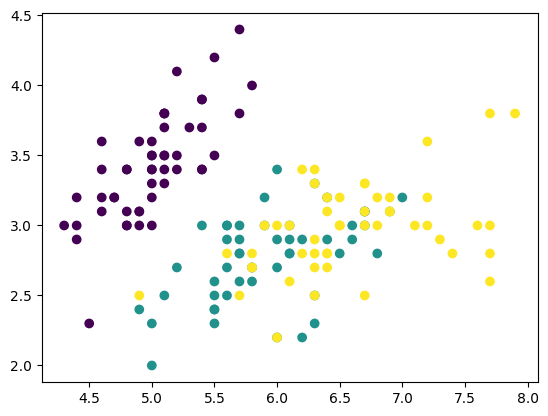

In [50]:
plt.scatter(x[:,0],x[:,1],c=y)

In [29]:
df["target"]=y

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,train_size=0.8)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [40]:
wcss=[]
for k in range(1,19):
    cluster=KMeans(n_clusters=k,init="k-means++")
    cluster.fit(x_train_scaled)
    wcss.append(cluster.inertia_)

In [41]:
wcss

[480.00000000000006,
 175.72847952302024,
 108.45974350766431,
 86.94873301546853,
 72.39180574537438,
 63.39463899058264,
 59.432067009544994,
 48.136985075183276,
 43.05316857204231,
 39.29459375332657,
 34.612992295000026,
 35.883102651256806,
 29.733927582146283,
 30.004339679718754,
 24.042684299107577,
 23.743505770187507,
 22.396007265195042,
 19.606638229066785]

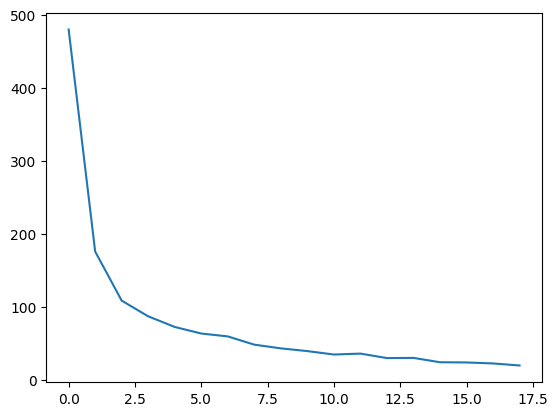

In [42]:
plt.plot(wcss)

In [43]:
kl=KneeLocator(range(1,19),wcss,curve="convex",direction="decreasing")
kl.elbow

np.int64(3)

In [46]:
kmean=KMeans(n_clusters=3,init="k-means++")
kmean.fit(x_train_scaled)
y_predict=kmean.predict(x_test_scaled)
y_predict

array([1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 1, 0, 2], dtype=int32)

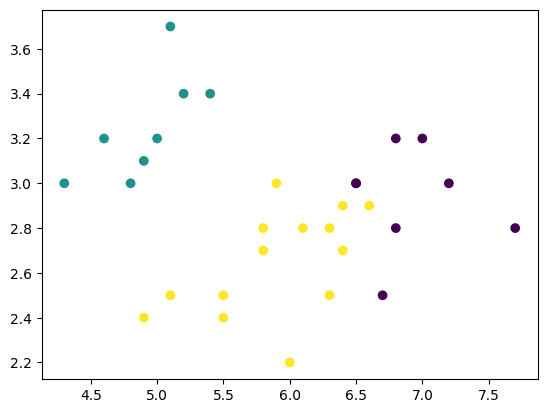

In [52]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict)